In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("C:/Users/DELL/OneDrive/Desktop/MOD_sim/Simulation")

# 1. Define theoretical metrics for M/M/1

In [2]:

def theoretical_mm1_metrics(lambda_rate, mu_rate):
    rho = lambda_rate / mu_rate
    if rho >= 1:
        return {
            "lambda": lambda_rate,
            "mu": mu_rate,
            "utilization": np.nan,
            "avg_waiting_time": np.nan,
            "avg_response_time": np.nan
        }
    Wq = (rho**2) / (lambda_rate * (1 - rho))
    W = 1 / (mu_rate - lambda_rate)
    return {
        "lambda": lambda_rate,
        "mu": mu_rate,
        "utilization": rho,
        "avg_waiting_time": Wq,
        "avg_response_time": W
    }


# 2. Load simulated data

In [3]:
df_sim = pd.read_csv("data/mm1_results.csv")
lambda_values = df_sim["lambda"].values
mu = df_sim["mu"].values[0]

# 3. Compute theoretical values

In [4]:
df_theory = pd.DataFrame([theoretical_mm1_metrics(lam, mu) for lam in lambda_values])

# 4. Merge both

In [5]:
df = df_sim.merge(df_theory, on=["lambda", "mu"], suffixes=("_sim", "_theory"))
df["error_response_time"] = abs(df["avg_response_time_sim"] - df["avg_response_time_theory"])
df["error_waiting_time"] = abs(df["avg_waiting_time_sim"] - df["avg_waiting_time_theory"])

# 5. Display comparison table

In [6]:
display(df[["lambda", "avg_response_time_sim", "avg_response_time_theory", "error_response_time",
            "avg_waiting_time_sim", "avg_waiting_time_theory", "error_waiting_time"]])

,lambda,avg_response_time_sim,avg_response_time_theory,error_response_time,avg_waiting_time_sim,avg_waiting_time_theory,error_waiting_time
0,0.1,1.111064,1.111111,0.000047,0.111035,0.111111,0.000076
1,0.2,1.249989,1.250000,0.000011,0.249887,0.250000,0.000113
2,0.3,1.428866,1.428571,0.000295,0.428713,0.428571,0.000142
3,0.4,1.666731,1.666667,0.000064,0.666563,0.666667,0.000103
4,0.5,1.999673,2.000000,0.000327,0.999582,1.000000,0.000418
5,0.6,2.501545,2.500000,0.001545,1.501311,1.500000,0.001311
6,0.7,3.332776,3.333333,0.000557,2.332597,2.333333,0.000737
7,0.8,5.001306,5.000000,0.001306,4.001157,4.000000,0.001157
8,0.9,10.017326,10.000000,0.017326,9.017163,9.000000,0.017163


## 6. Plot: response time comparison

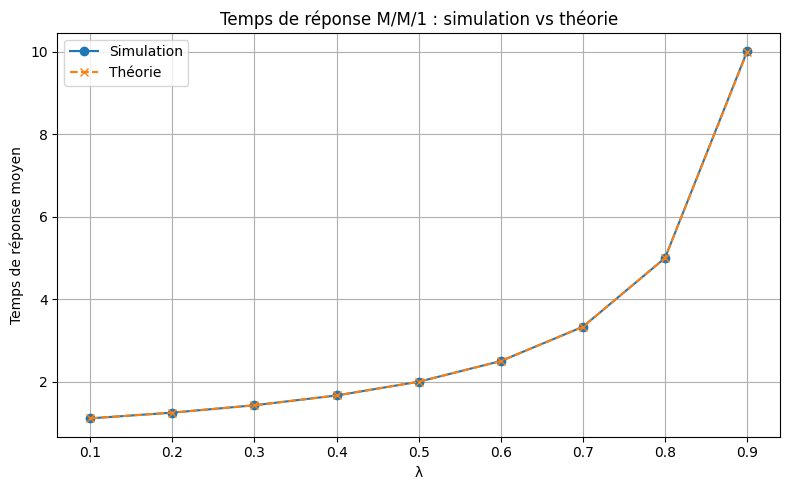

In [7]:

plt.figure(figsize=(8, 5))
plt.plot(df["lambda"], df["avg_response_time_sim"], 'o-', label="Simulation")
plt.plot(df["lambda"], df["avg_response_time_theory"], 'x--', label="Théorie")
plt.title("Temps de réponse M/M/1 : simulation vs théorie")
plt.xlabel("λ")
plt.ylabel("Temps de réponse moyen")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 7. Plot: absolute error

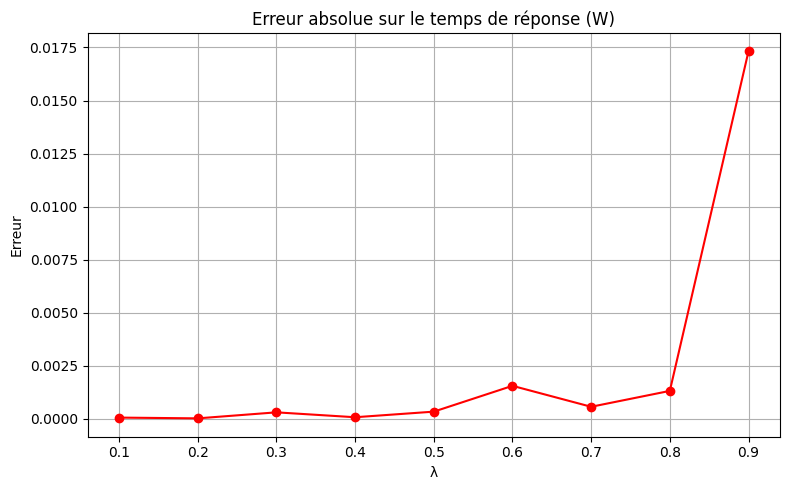

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(df["lambda"], df["error_response_time"], 'r-o')
plt.title("Erreur absolue sur le temps de réponse (W)")
plt.xlabel("λ")
plt.ylabel("Erreur")
plt.grid(True)
plt.tight_layout()
plt.show()